<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [28]:
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install scikit-learn

We will import the following libraries for the lab


In [29]:
# Pandas é uma biblioteca de software escrita para a linguagem de programação Python para manipulação e análise de dados.
import pandas as pd
# NumPy é uma biblioteca para a linguagem de programação Python, adicionando suporte para grandes arrays e matrizes multidimensionais, juntamente com uma grande coleção de funções matemáticas de alto nível para operar nesses arrays.
import numpy as np
# Matplotlib é uma biblioteca de plotagem para Python e pyplot nos fornece uma estrutura de plotagem semelhante ao MatLab. Usaremos isso em nossa função de plotagem para plotar dados.
import matplotlib.pyplot as plt
# Seaborn é uma biblioteca de visualização de dados em Python baseada no matplotlib. Ela fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos.
import seaborn as sns
# asassasa
import os
# Preprocessing nos permite padronizar nossos dados
from sklearn import preprocessing
# Permite-nos dividir nossos dados em dados de treinamento e teste
from sklearn.model_selection import train_test_split
# Permite-nos testar parâmetros de algoritmos de classificação e encontrar o melhor
from sklearn.model_selection import GridSearchCV
# Algoritmo de classificação de Regressão Logística
from sklearn.linear_model import LogisticRegression
# Algoritmo de classificação de Máquina de Vetores de Suporte (SVM)
from sklearn.svm import SVC
# Algoritmo de classificação de Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier
# Algoritmo de classificação de K Vizinhos Mais Próximos
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [30]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [31]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


In [32]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [33]:

X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')

In [34]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [35]:
# Crie um array NumPy a partir da coluna 'Class' e atribua-o à variável 'Y'
Y = data['Class'].to_numpy()

# Verificar o tipo de Y
print(type(Y))
# Verificar os primeiros 5 elementos de Y
print(Y[:5])

<class 'numpy.ndarray'>
[0 0 0 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [36]:
# Crie o transformador de padronização
transform = preprocessing.StandardScaler()

# Ajuste e transforme os dados em X
X = transform.fit_transform(X)

# Verifique o resultado
print(X[:5])

[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
   7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
  -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
   9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
  -1.50755672e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.50755

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [37]:
# Supondo que X e Y já estejam definidos
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Verificação das dimensões dos conjuntos de dados
print("Dimensões do conjunto de treinamento X:", X_train.shape)
print("Dimensões do conjunto de teste X:", X_test.shape)
print("Dimensões do conjunto de treinamento Y:", Y_train.shape)
print("Dimensões do conjunto de teste Y:", Y_test.shape)

Dimensões do conjunto de treinamento X: (72, 83)
Dimensões do conjunto de teste X: (18, 83)
Dimensões do conjunto de treinamento Y: (72,)
Dimensões do conjunto de teste Y: (18,)


we can see we only have 18 test samples.


In [38]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [39]:
# Parâmetros para o GridSearchCV
parameters = {'C': [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}

# Criar um objeto de regressão logística
lr = LogisticRegression()

# Criar um objeto GridSearchCV com cv = 10
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)

# Ajustar o objeto para encontrar os melhores parâmetros
logreg_cv.fit(X_train, Y_train)

# Exibir os melhores parâmetros
print("Melhores Parâmetros: ", logreg_cv.best_params_)

Melhores Parâmetros:  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [40]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [41]:
# Calcular a acurácia no conjunto de dados de teste
accuracy_test = logreg_cv.score(X_test, Y_test)

# Exibir a acurácia
print("Acurácia no conjunto de teste:", accuracy_test)

logistic_regression_accuracy = accuracy_test

Acurácia no conjunto de teste: 0.8333333333333334


Lets look at the confusion matrix:


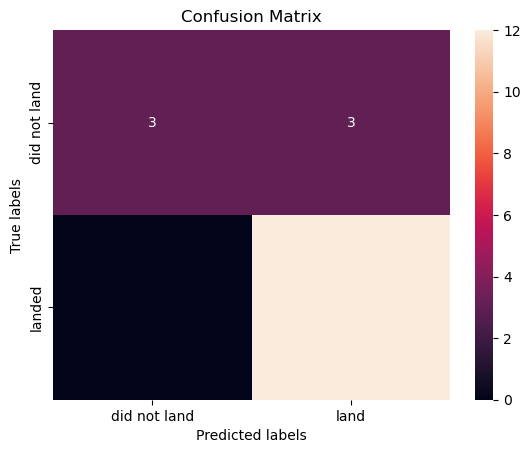

In [42]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [43]:
# Definir os parâmetros para o GridSearchCV
parameters = {'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma': np.logspace(-3, 3, 5)}

# Criar um objeto de Máquina de Vetores de Suporte
svm = SVC()

# Criar um objeto GridSearchCV com cv = 10
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)

# Ajustar o objeto para encontrar os melhores parâmetros
svm_cv.fit(X_train, Y_train)

# Exibir os melhores parâmetros
print("Tuned hyperparameters :(best parameters) ", svm_cv.best_params_)

# Exibir a acurácia no conjunto de validação
print("Accuracy :", svm_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
Accuracy : 0.8482142857142856


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [44]:
# Calcular a acurácia no conjunto de dados de teste
accuracy_test = svm_cv.score(X_test, Y_test)

# Exibir a acurácia
print("Acurácia no conjunto de teste:", accuracy_test)

support_vector_machine_accuracy = accuracy_test

Acurácia no conjunto de teste: 0.8333333333333334


We can plot the confusion matrix


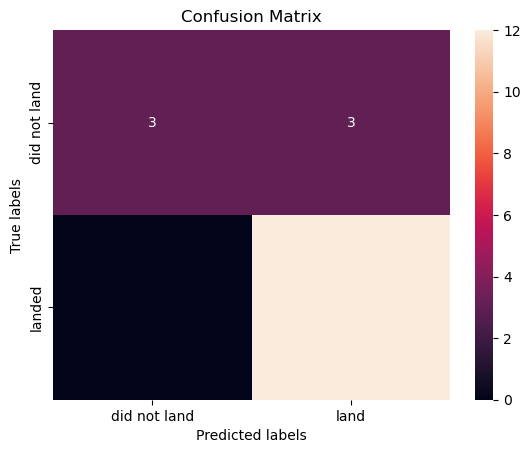

In [45]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [46]:
#parameters = {'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [2*n for n in range(1,10)],
#     'max_features': ['auto', 'sqrt'],
#     'min_samples_leaf': [1, 2, 4],
#     'min_samples_split': [2, 5, 10]}
#
#tree = DecisionTreeClassifier()

In [47]:
# Definir os parâmetros para o GridSearchCV
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1, 10)],
              'max_features': ['sqrt', 'log2', None],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

# Criar um objeto de classificador de árvore de decisão
tree = DecisionTreeClassifier()

# Criar um objeto GridSearchCV com cv = 10
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)

# Ajustar o objeto para encontrar os melhores parâmetros
tree_cv.fit(X_train, Y_train)

C:\conda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [48]:
# Exibir os melhores parâmetros
print("Tuned hyperparameters :(best parameters) ", tree_cv.best_params_)

# Exibir a acurácia no conjunto de validação
print("Accuracy :", tree_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [49]:
# Calcular a acurácia no conjunto de dados de teste
accuracy_test = tree_cv.score(X_test, Y_test)

# Exibir a acurácia
print("Acurácia no conjunto de teste:", accuracy_test)

decision_tree_accuracy = accuracy_test

Acurácia no conjunto de teste: 0.6666666666666666


We can plot the confusion matrix


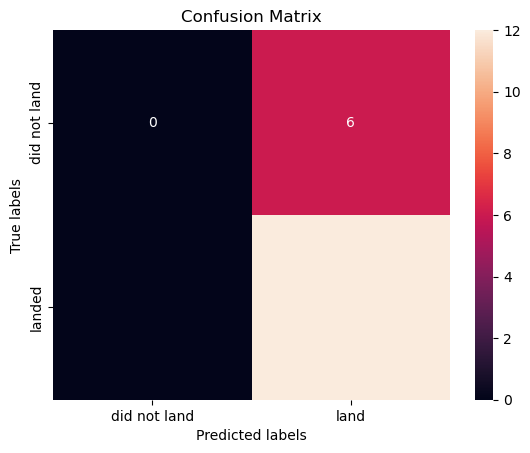

In [50]:
# Fazer previsões no conjunto de teste
yhat = tree_cv.predict(X_test)

# Plotar a matriz de confusão
plot_confusion_matrix(Y_test, yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [51]:
#parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#              'p': [1,2]}
#
#KNN = KNeighborsClassifier()

In [52]:
# Definir a variável de ambiente para o número de núcleos que deseja usar
os.environ['LOKY_MAX_CPU_COUNT'] = '4'  # Substitua '4' pelo número de núcleos desejado

# Definir os parâmetros para o GridSearchCV
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

# Criar um objeto de K-Nearest Neighbors
KNN = KNeighborsClassifier()

# Criar um objeto GridSearchCV com cv = 10
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, cv=10)

# Ajustar o objeto para encontrar os melhores parâmetros
knn_cv.fit(X_train, Y_train)

C:\conda\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\conda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\conda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\conda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\conda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [53]:
# Exibir os melhores parâmetros
print("Tuned hyperparameters :(best parameters) ", knn_cv.best_params_)

# Exibir a acurácia no conjunto de validação
print("Accuracy :", knn_cv.best_score_)

Tuned hyperparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [54]:
# Calcular a acurácia no conjunto de dados de teste
accuracy_test = knn_cv.score(X_test, Y_test)

# Exibir a acurácia
print("Acurácia no conjunto de teste:", accuracy_test)

knn_accuracy = accuracy_test

Acurácia no conjunto de teste: 0.8333333333333334


We can plot the confusion matrix


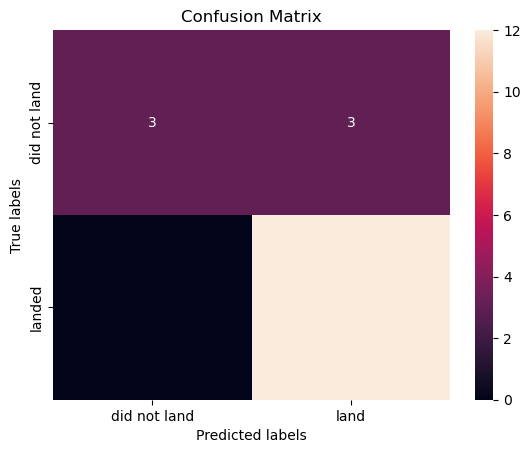

In [55]:
# Fazer previsões no conjunto de teste
yhat = knn_cv.predict(X_test)

# Plotar a matriz de confusão
plot_confusion_matrix(Y_test, yhat)

## TASK  12


Find the method performs best:


In [56]:
#Performace de todos os modelos:


print("Resultado de Logistic Regression: {:.2f}".format(logistic_regression_accuracy))
print("Resultado de Support Vector Machine (SVM): {:.2f}".format(support_vector_machine_accuracy))
print("Resultado de Decision Tree: {:.2f}".format(decision_tree_accuracy))
print("Resultado de K-Nearest Neighbors (KNN): {:.2f}".format(knn_accuracy))

Resultado de Logistic Regression: 0.83
Resultado de Support Vector Machine (SVM): 0.83
Resultado de Decision Tree: 0.67
Resultado de K-Nearest Neighbors (KNN): 0.83


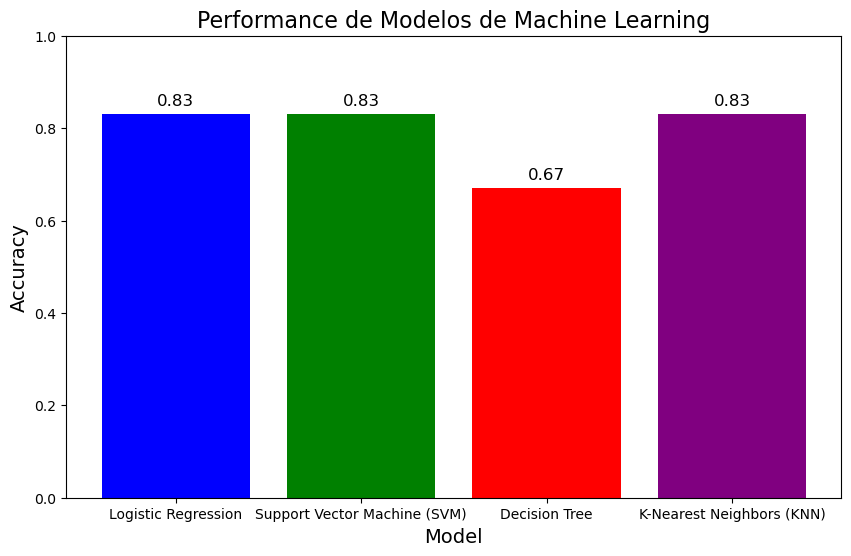

In [57]:
import matplotlib.pyplot as plt

# Dados de desempenho dos modelos
model_names = ['Logistic Regression', 'Support Vector Machine (SVM)', 'Decision Tree', 'K-Nearest Neighbors (KNN)']
model_accuracies = [logistic_regression_accuracy, support_vector_machine_accuracy, decision_tree_accuracy, knn_accuracy]

# Formatar os valores das variáveis para duas casas decimais 
model_accuracies = [round(acc, 2) for acc in model_accuracies]

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(model_names, model_accuracies, color=['blue', 'green', 'red', 'purple'])

# Adicionar títulos e rótulos
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Performance de Modelos de Machine Learning', fontsize=16)
plt.ylim(0, 1)

# Adicionar os valores nas barras
for i, v in enumerate(model_accuracies):
    plt.text(i, v + 0.02, str(v), color='black', ha='center', fontsize=12)

# Mostrar o gráfico
plt.show()

#### Todos os métodos apresentaram a mesma acurácia de 83%. Este é um resultado interessante, e pode indicar que todos os modelos estão capturando padrões semelhantes nos dados. No entanto, escolher o melhor modelo pode depender de outros fatores além da acurácia.

##### Considerações Adicionais para Escolher o Melhor Modelo:


##### Tempo de Treinamento e Previsão:

Logistic Regression: Geralmente rápido para treinar e prever.

SVM: Pode ser mais lento em grandes conjuntos de dados.

Decision Tree: Rápido para treinar e interpretar.

KNN: Pode ser lento para prever, especialmente com grandes conjuntos de dados.


##### Interpretabilidade:

Logistic Regression e Decision Tree: Fácil de interpretar e explicar.

SVM e KNN: Mais difíceis de interpretar.


##### Robustez a Outliers e Escalabilidade:

Logistic Regression e SVM: Podem ser sensíveis a outliers.

Decision Tree: Pode lidar bem com outliers, mas pode overfitar.

KNN: Sensível a outliers e pode se tornar lento com muitos dados.


##### Usabilidade em Diferentes Cenários:

Logistic Regression: Útil para problemas lineares.

SVM: Potente para dados não lineares com a escolha correta do kernel.

Decision Tree: Bom para problemas com hierarquia e regras de decisão.

KNN: Útil quando a proximidade dos dados é crucial.


##### Resumo:

Embora todos os modelos tenham a mesma acurácia, a escolha final pode depender das suas necessidades específicas, como interpretabilidade, tempo de treinamento e previsão, ou robustez a outliers. A Logistic Regression e a Decision Tree são geralmente mais interpretáveis, enquanto o SVM pode ser poderoso para dados complexos. O KNN pode ser útil em cenários específicos, mas seu uso deve ser ponderado devido ao tempo de previsão.

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
